In [1]:
import pandas as pd
import os
from scipy.stats import spearmanr
import numpy as np
import argparse
from matplotlib import pyplot as plt
import seaborn as sns

In [82]:
result_dir = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_0917_variational_size"
benchmarks = os.listdir(result_dir)

In [80]:
result_folder.benchmark_name.unique()

array(['TAT_HV1BR', 'SQSTM_MOUSE', 'VRPI_BPT7', 'ILF3_HUMAN',
       'CCDB_ECOLI', 'SUMO1_HUMAN', 'PKN1_HUMAN', 'VG08_BPP22',
       'ARGR_ECOLI', 'ENVZ_ECOLI', 'DN7A_SACS2', 'OTU7A_HUMAN',
       'A0A247D711_LISMN', 'HCP_LAMBD', 'IF1_ECOLI', 'SCIN_STAAR',
       'RS15_GEOSE', 'SBI_STAAM', 'SOX30_HUMAN', 'FKBP3_HUMAN'],
      dtype=object)

In [83]:
result_folder = pd.DataFrame({"benchmark_name": [],
                              "model": [],
                              "spearmanr_pred": [],
                              "ndcg_pred": []})

model_list = ["DeepSequence_single", "DeepSequence_ensemble", "MSA_Transformer_single", "MSA_Transformer_ensemble",
              "ESM1b", "ESM1v_single", "ESM1v_ensemble", "ESM2_15B", "ESM2_3B", "Progen2_xlarge", "Progen2_large", "ProtGPT2",
              "ESM-IF1", "ProteinMPNN", "UNAAGI"]
for benchmark in benchmarks:
    benchmark_name = '_'.join(benchmark.split('_')[:2])
    bm_path = os.path.join(result_dir, benchmark)
    result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
    for model in model_list:
        spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
        ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
        result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                "model": [model],
                                                                "spearmanr_pred": [spr],
                                                                "ndcg_pred": [ndcg]})], ignore_index=True)
        


In [84]:
pepinvent_result = pd.DataFrame({"benchmark_name": ['IF1_ECOLI', 'RS15_GEOSE', 'VRPI_BPT7', 'VG08_BPP22', 'PKN1_HUMAN', 'DN7A_SACS2', 'FKBP3_HUMAN', 'SBI_STAAM', 'SQSTM_MOUSE', 'HCP_LAMBD', 'ILF3_HUMAN', 'ARGR_ECOLI',
                                                    'SOX30_HUMAN', 'SUMO1_HUMAN', 'ENVZ_ECOLI', 'SCIN_STAAR', 'OTU7A_HUMAN', 'A0A247D711_LISMN', 'CCDB_ECOLI', 'TAT_HV1BR'],
                                "model": ["PepINVENT"]*20,
                                "spearmanr_pred": [-0.06443213696472441,
 0.264607339473792,
 -0.08279028658325761,
 0.2637281077449826,
 -0.48186942465242666,
 0.19460044992590877,
 0.06652207278252534,
 0.06985534225889858,
 0.026235178981722035,
 0.07829012556470633,
 0.013977673150527874,
 0.002412223050785356,
 0.2015208981419418,
 0.013418228068519078,
 -0.09086600489212049,
 -0.05979276237871516,
 0.03434783800096417,
 -0.08306684713580458,
 0.05075676646905922,
 0.1469271609613666],
                                "ndcg_pred": [0] * 20})

In [85]:
# concatenate pepinvent to result_folder
result_folder = pd.concat([result_folder, pepinvent_result], ignore_index=True)

In [86]:
result_folder

,benchmark_name,model,spearmanr_pred,ndcg_pred
0,TAT_HV1BR,DeepSequence_single,0.325890,0.744651
1,TAT_HV1BR,DeepSequence_ensemble,0.336239,0.743906
2,TAT_HV1BR,MSA_Transformer_single,0.377270,0.735960
3,TAT_HV1BR,MSA_Transformer_ensemble,0.396975,0.740175
4,TAT_HV1BR,ESM1b,0.223155,0.592839
...,...,...,...,...
315,SCIN_STAAR,PepINVENT,-0.059793,0.000000
316,OTU7A_HUMAN,PepINVENT,0.034348,0.000000
317,A0A247D711_LISMN,PepINVENT,-0.083067,0.000000
318,CCDB_ECOLI,PepINVENT,0.050757,0.000000


In [17]:
result_folder.to_csv("all_results.csv", index=False)

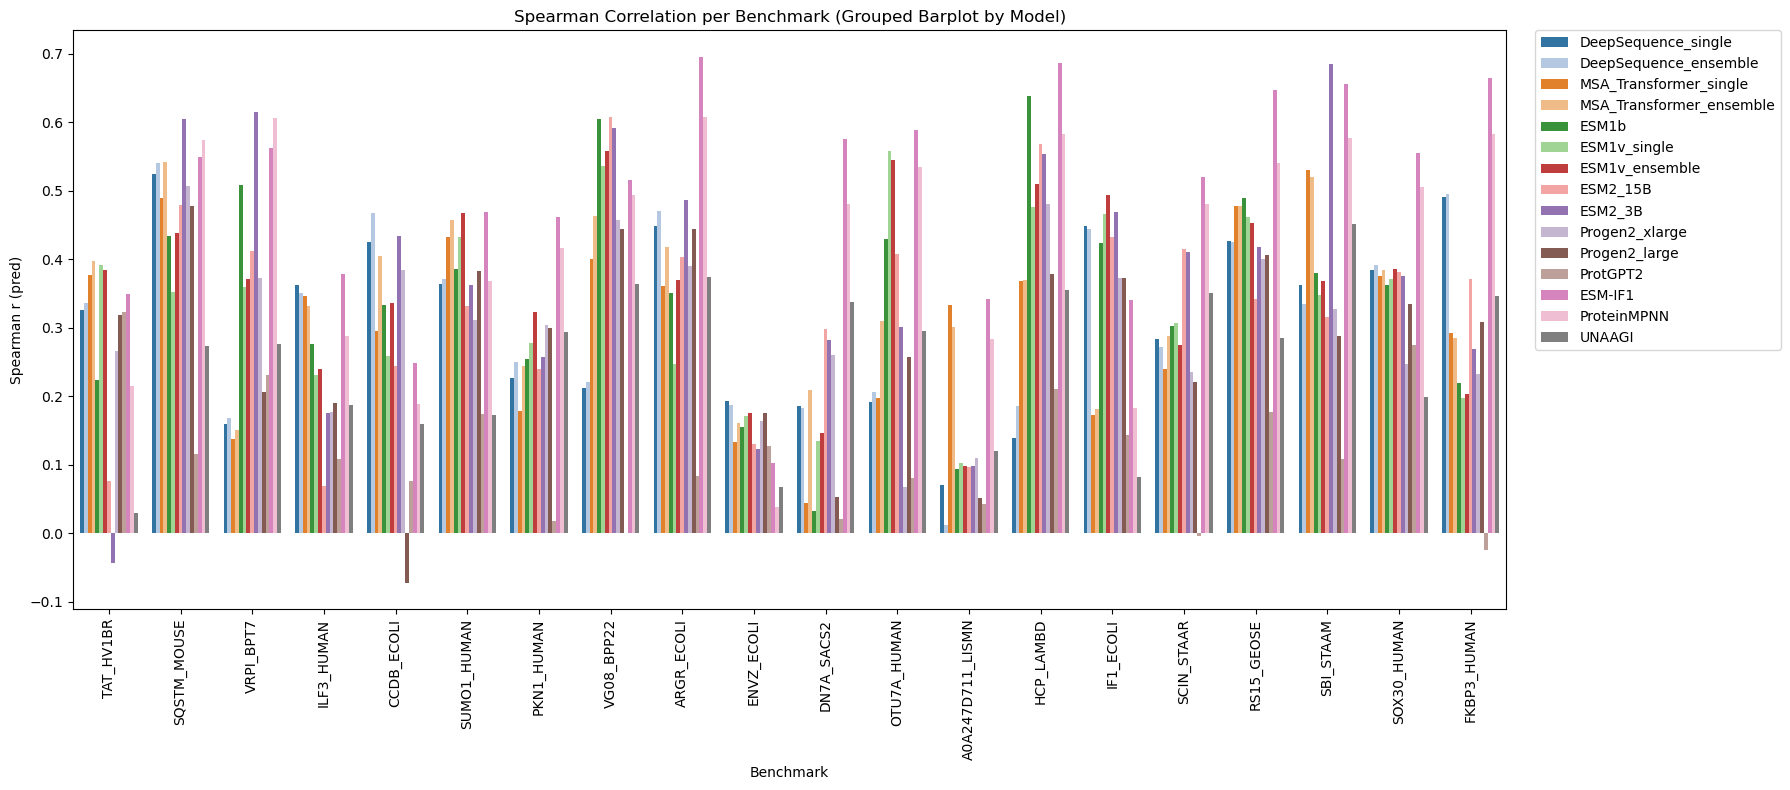

In [20]:
plt.figure(figsize=(18, 8))

sns.barplot(
    data=result_folder,
    x="benchmark_name",
    y="spearmanr_pred",
    hue="model",
    errorbar=None,   # turn off error bars since each row is already one observation
    palette="tab20"
)

plt.xticks(rotation=90)
plt.title("Spearman Correlation per Benchmark (Grouped Barplot by Model)")
plt.ylabel("Spearman r (pred)")
plt.xlabel("Benchmark")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

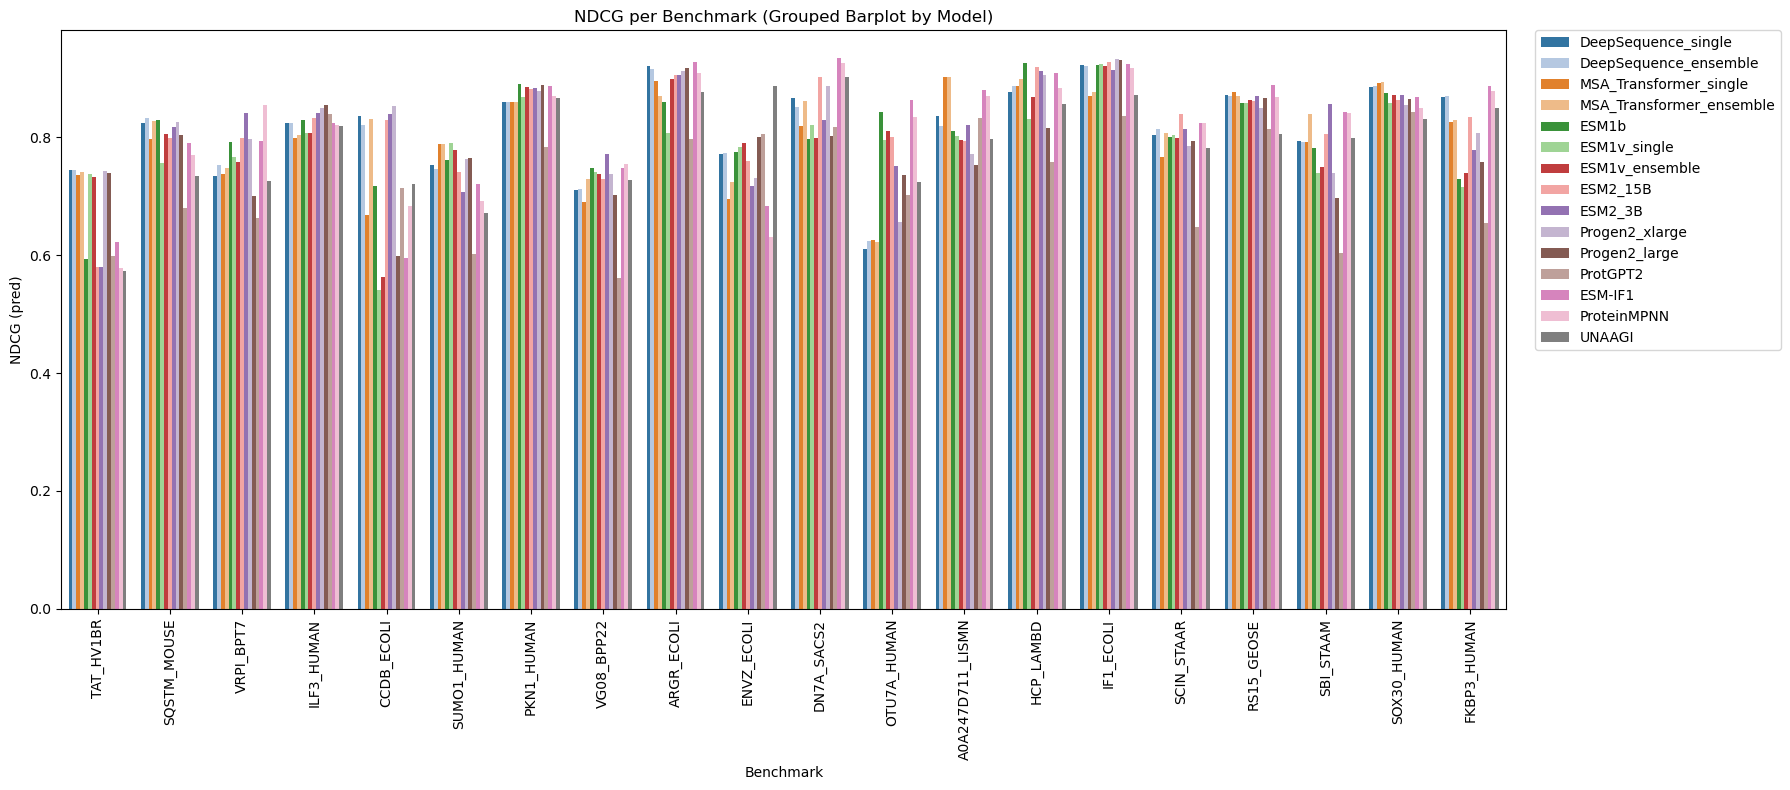

In [21]:
plt.figure(figsize=(18, 8))

sns.barplot(
    data=result_folder,
    x="benchmark_name",
    y="ndcg_pred",
    hue="model",
    errorbar=None,   # turn off error bars since each row is already one observation
    palette="tab20"
)

plt.xticks(rotation=90)
plt.title("NDCG per Benchmark (Grouped Barplot by Model)")
plt.ylabel("NDCG (pred)")
plt.xlabel("Benchmark")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.show()

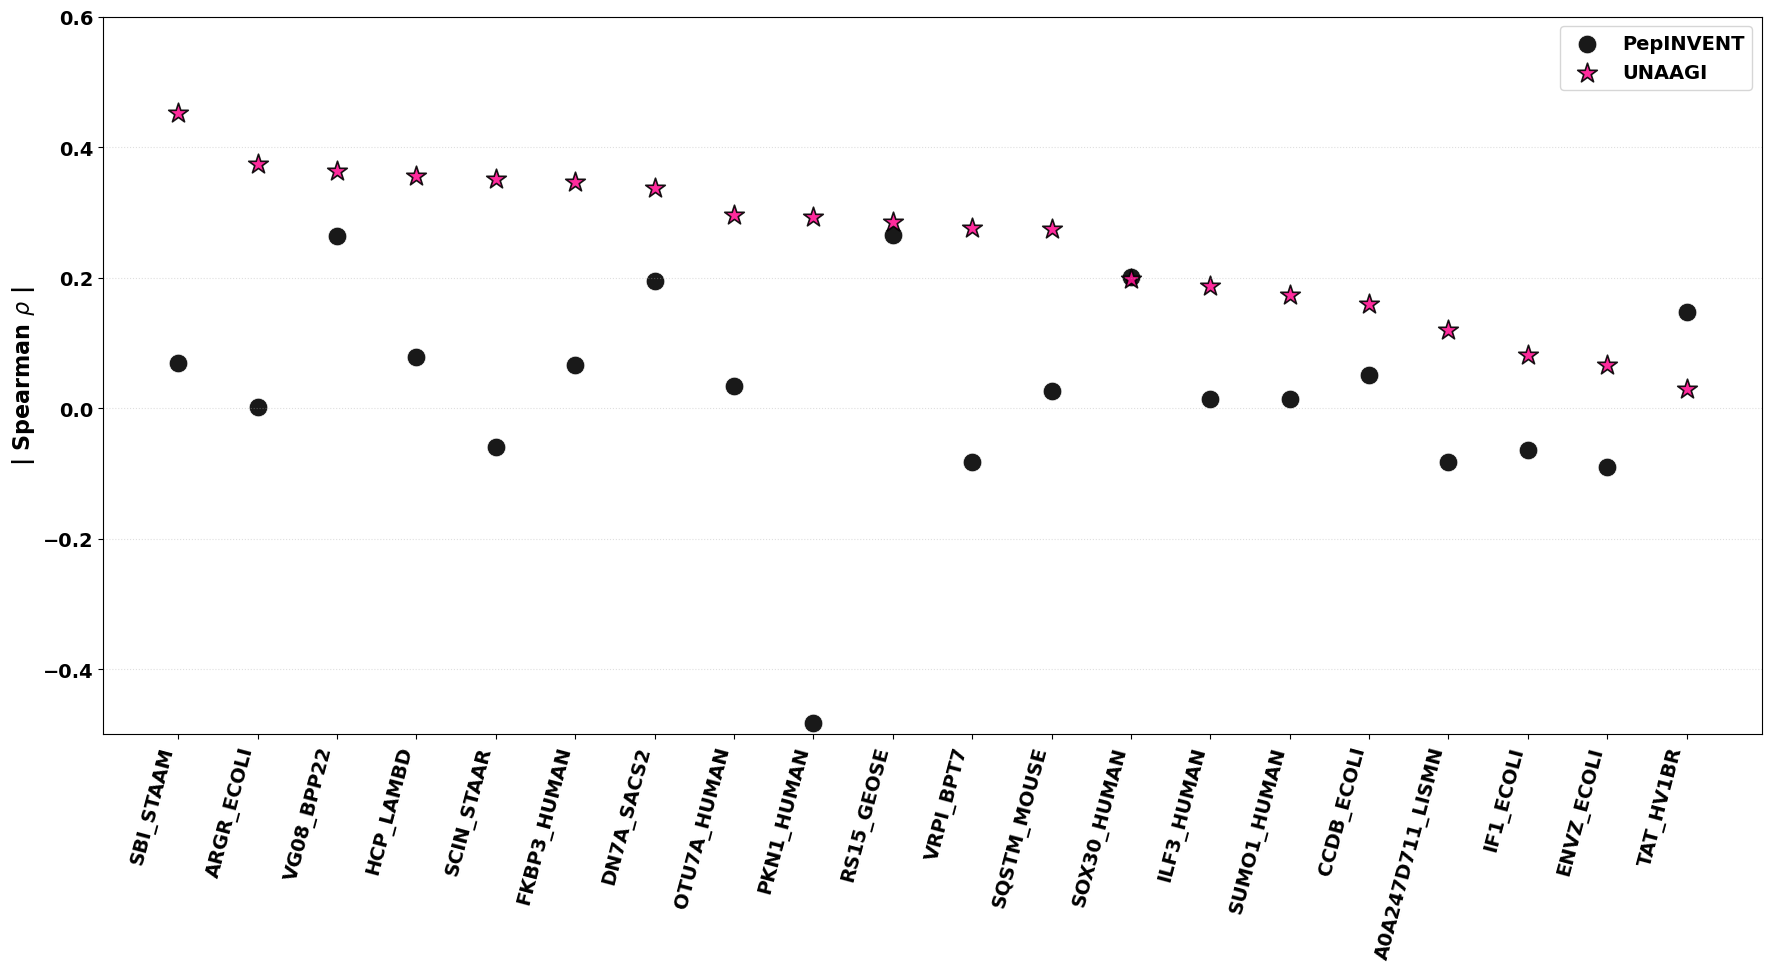

In [88]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    "PepINVENT",
    "UNAAGI",
]
colors = {
    "PepINVENT": "black",     # black
    "ProteinMPNN": "#1f78b4",             # dark blue
    "ESM2_3B": "#33a02c",                 # dark green
    "UNAAGI": "#ff1493",                  # bright red (highlight)
    "ESM1v_ensemble": "#ff7f00",          # orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666"
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[-1]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    if m == ref_model:
        y = piv_sorted[m].values
        plt.scatter(
            x, y, marker="*",
            s=220,
            alpha=0.9,
            label=m,
            edgecolor="black",
            linewidth=1.2,
            color=colors.get(m, None)  # fallback to Matplotlib default if not specified
        )
    else:
        y = piv_sorted[m].values
        plt.scatter(
            x, y,
            s=180,
            alpha=0.9,
            label=m,
            edgecolor="white",
            linewidth=0.6,
            color=colors.get(m, None)  # fallback to Matplotlib default if not specified
        )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.5, 0.6)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.legend(title="", frameon=True, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
plt.savefig("UNAAGI_proteingym_atomic.svg", format="svg", dpi=300)
plt.show()




plt.show()


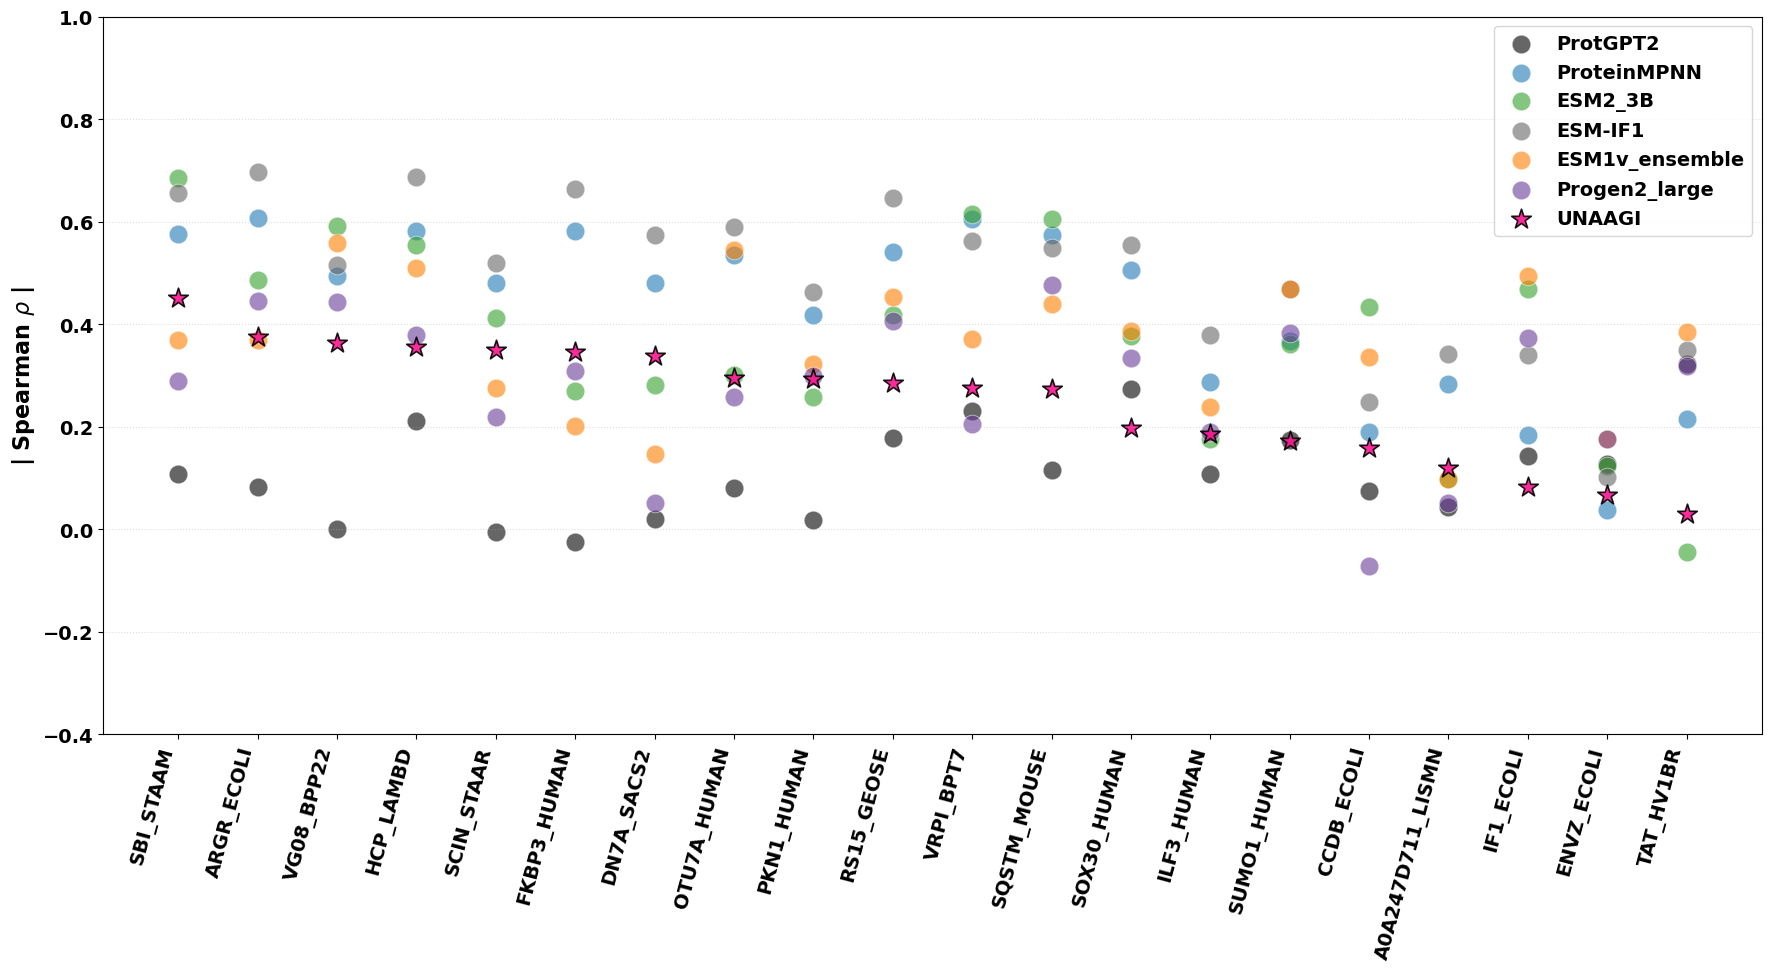

In [76]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    "ProtGPT2",
    "ProteinMPNN",
    "ESM2_3B",
    "ESM-IF1",
    "ESM1v_ensemble",
    "Progen2_large",
    "UNAAGI",
]
colors = {
    "ProtGPT2": "black",     # black
    "ProteinMPNN": "#1f78b4",             # dark blue
    "ESM2_3B": "#33a02c",                 # dark green
    "UNAAGI": "#ff1493",                  # bright red (highlight)
    "ESM1v_ensemble": "#ff7f00",          # orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666"
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[-1]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    if m == ref_model:
        y = piv_sorted[m].values
        plt.scatter(
            x, y, marker="*",
            s=220,
            alpha=0.9,
            label=m,
            edgecolor="black",
            linewidth=1.2,
            color=colors.get(m, None)  # fallback to Matplotlib default if not specified
        )
    else:
        y = piv_sorted[m].values
        plt.scatter(
            x, y,
            s=180,
            alpha=0.6,
            label=m,
            edgecolor="white",
            linewidth=0.6,
            color=colors.get(m, None)  # fallback to Matplotlib default if not specified
        )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.4, 1.0)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.legend(title="", frameon=True, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
plt.savefig("UNAAGI_proteingym.svg", format="svg", dpi=300)
plt.show()




plt.show()


In [36]:
result_folder[result_folder['benchmark_name']=='ENVZ_ECOLI']

,benchmark_name,model,spearmanr_pred,ndcg_pred
135,ENVZ_ECOLI,DeepSequence_single,0.192307,0.771592
136,ENVZ_ECOLI,DeepSequence_ensemble,0.187501,0.772910
137,ENVZ_ECOLI,MSA_Transformer_single,0.132900,0.694839
138,ENVZ_ECOLI,MSA_Transformer_ensemble,0.161163,0.724433
139,ENVZ_ECOLI,ESM1b,0.155161,0.774639
140,ENVZ_ECOLI,ESM1v_single,0.170904,0.782520
141,ENVZ_ECOLI,ESM1v_ensemble,0.175925,0.789689
142,ENVZ_ECOLI,ESM2_15B,0.130272,0.758730
143,ENVZ_ECOLI,ESM2_3B,0.122794,0.717827
144,ENVZ_ECOLI,Progen2_xlarge,0.164140,0.730426


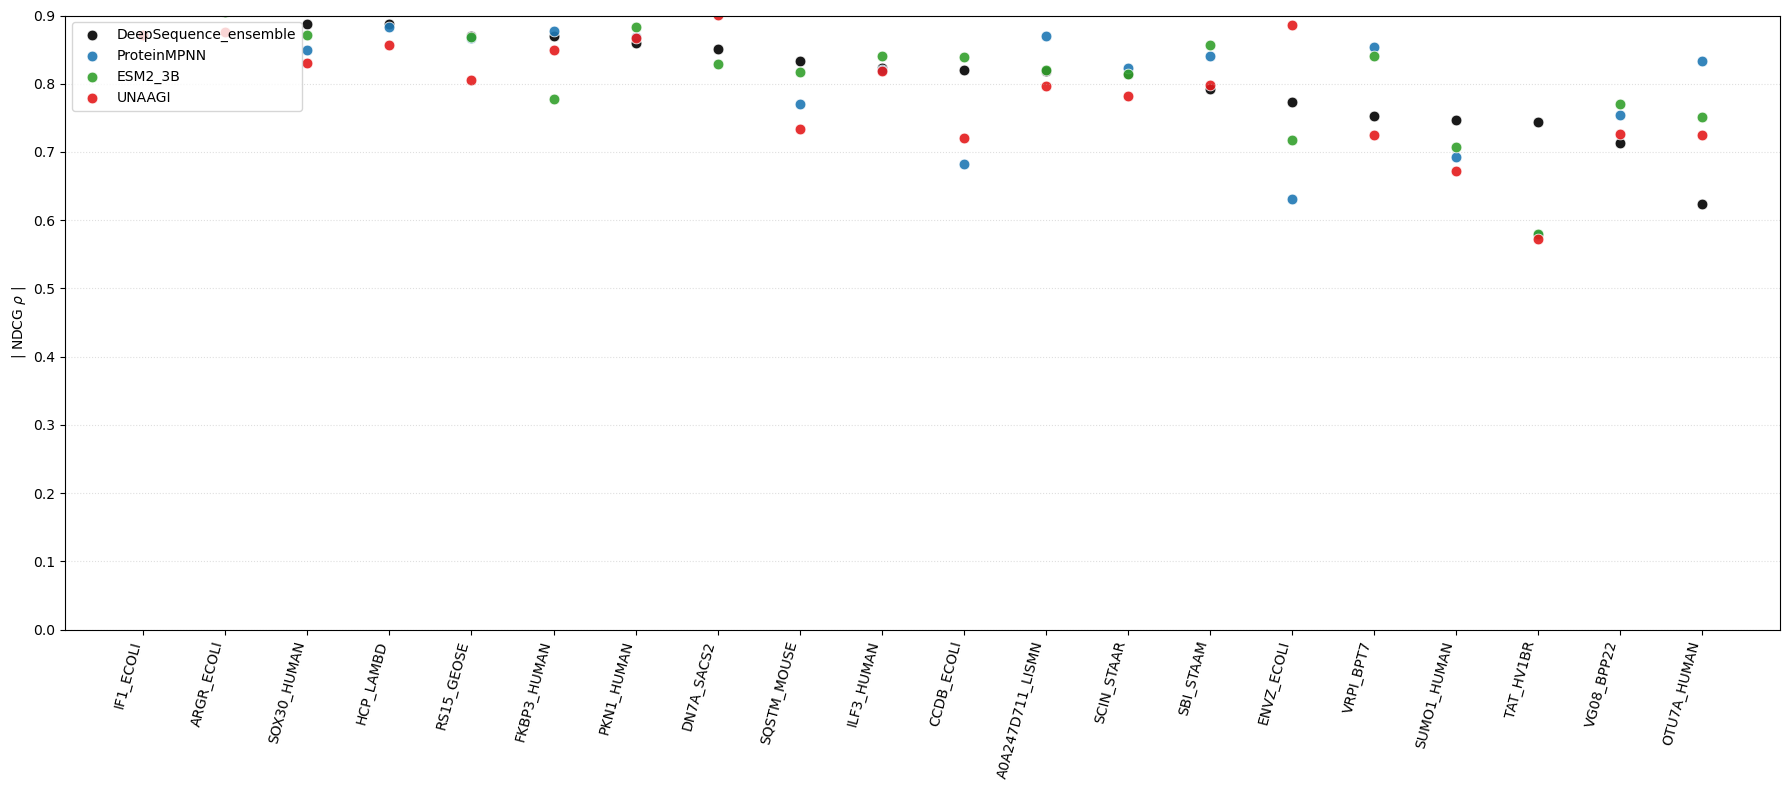

In [25]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    "DeepSequence_ensemble",
    "ProteinMPNN",
    "ESM2_3B",
    "UNAAGI",
]
colors = {
    "DeepSequence_ensemble": "black",     # black
    "ProteinMPNN": "#1f78b4",             # dark blue
    "ESM2_3B": "#33a02c",                 # dark green
    "UNAAGI": "#e41a1c",                  # bright red (highlight)
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="ndcg_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[0]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.figure(figsize=(18, 8))

for m in models_to_plot:
    y = piv_sorted[m].values
    plt.scatter(
        x, y,
        s=60,
        alpha=0.9,
        label=m,
        edgecolor="white",
        linewidth=0.6,
        color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| NDCG $\rho$ |")
plt.ylim(0, 0.9)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.legend(title="", frameon=True, loc="upper left", bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.show()


In [ ]:
ncaa_baseline = pd.DataFrame({"benchmark_name":['CP2', 'PUMA']})